# Import dataset

In [ ]:
# Standard analytics packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import mutual_info_regression, f_regression
# Import models
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
# Model evaluation 
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import GridSearchCV
# Import model engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Import linear regression models
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
# Import Decision Tree models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [ ]:
#import csv files
#url_allmovie = 'https://raw.githubusercontent.com/JihoonChung/MIE368_project/master/rotten_tomatoes_full.csv'
url_allmovie = 'https://raw.githubusercontent.com/JihoonChung/MIE368_project/master/rotten_tomatoes_full_revised.csv'
df_rotten_tomatoes_full = pd.read_csv(url_allmovie)


In [ ]:
df_rotten_tomatoes_full.head()
#df_rotten_tomatoes_full.shape

,Title,TOMATOMETER score,TOMATOMETER Count,AUDIENCE score,AUDIENCE count,Year,Cast 1,Cast 2,Cast 3,director_name,Runtime,Genre_Action,Genre_Art&Foreign,Genre_Classics,Genre_Comedy,Genre_Documentary,Genre_Drama,Genre_Horror,Genre_Kids&Family,Genre_Mystery,Genre_Romance,Genre_SciFi,Rating_G,Rating_NC17,Rating_NR,Rating_PG,Rating_PG-13,Rating_R,cast1_oscar_nom,cast1_oscars,cast2_oscar_nom,cast2_oscars,cast3_oscar_nom,cast3_oscars,cast1_FB_likes,cast2_FB_likes,cast3_FB_likes,dir_oscar_nom,dir_oscars,director_awards,director_facebook_likes,cast_total_facebook_likes
0,Drive,0.0,7,13.0,15,2011,Ryan Gosling,Carey Mulligan,Albert Brooks,Nicolas Winding Refn,100,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,2.0,0.0,1.0,0.0,1.0,0.0,33000.0,367.0,745.0,0.0,0.0,69.0,0.0,34337.0
1,American Son,50.0,24,47.0,282,2008,Nick Cannon,Melonie Diaz,Matt O'Leary,Neil Abramson,85,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,593.0,270.0,303.0,0.0,0.0,0.0,232.0,0.0
2,Primal,38.0,32,27.0,48,2010,Zoe Tuckwell-Smith,Krew Boylan,Lindsay Farris,Josh Reed,84,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,367.0,367.0,367.0,0.0,0.0,0.0,232.0,0.0
3,The Kill Team,70.0,47,43.0,63,2014,Adam Winfield,Jeremy Morlock,Andrew Holmes,Dan Krauss,79,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,367.0,367.0,367.0,0.0,0.0,0.0,232.0,0.0
4,Trick,32.0,25,45.0,51,1999,Christian Campbell,John Paul Pitoc,Tori Spelling,Jim Fall,90,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,168.0,367.0,396.0,0.0,0.0,0.0,13.0,0.0


# Separate train and test dataset.

In [ ]:
# one thing is we might have to drop total fb like since now its completely irrelevant. This feature might be introduce in the feature engineering section. 

In [ ]:
column_drop = ['Cast 1','Cast 2','Cast 3','director_name','Title','Year','AUDIENCE score','AUDIENCE count','cast_total_facebook_likes']


X = df_rotten_tomatoes_full.drop(columns = column_drop)
X_train, X_val, y_train, y_val = train_test_split(X,  # all X data
                                                    df_rotten_tomatoes_full['AUDIENCE score'],  # All y data
                                                    test_size=0.30,  # Fraction of data in test set
                                                    shuffle=True,  # Randomly splits the data
                                                    random_state = 3  # Sets random seed for reproducability 
                                                    )
#we can do audience so we can keep Totmatometer score and tomatometer count since critics' score came out first so we can say this is okay as a parameter when we 
#plan the movie.
X_train.head()

,TOMATOMETER score,TOMATOMETER Count,Runtime,Genre_Action,Genre_Art&Foreign,Genre_Classics,Genre_Comedy,Genre_Documentary,Genre_Drama,Genre_Horror,Genre_Kids&Family,Genre_Mystery,Genre_Romance,Genre_SciFi,Rating_G,Rating_NC17,Rating_NR,Rating_PG,Rating_PG-13,Rating_R,cast1_oscar_nom,cast1_oscars,cast2_oscar_nom,cast2_oscars,cast3_oscar_nom,cast3_oscars,cast1_FB_likes,cast2_FB_likes,cast3_FB_likes,dir_oscar_nom,dir_oscars,director_awards,director_facebook_likes
70,95.0,19,70,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,488.0,367.0,367.0,0.0,0.0,0.0,232.0
75,73.0,15,71,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,367.0,367.0,367.0,0.0,0.0,0.0,232.0
889,92.0,7,104,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,367.0,367.0,367.0,0.0,0.0,0.0,232.0
1210,40.0,190,120,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,8000.0,5000.0,367.0,0.0,0.0,6.0,124.0
720,63.0,104,82,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,338.0,367.0,956.0,0.0,0.0,0.0,232.0


# Models

In [ ]:
def make_models():
  """Makes a dictionary of 5 untrained models"""
  #IDK WHAT PARAMETERS TO PUT FOR THE TREES
  return {
      'LinReg': LinearRegression(),
      'LassoCV': LassoCV(),
      'RidgeCV': RidgeCV(),
      'RF': RandomForestRegressor(),
      'CART': DecisionTreeRegressor()
  }

  #'RF': RandomForestRegressor(max_features=0.2,bootstrap=True,n_estimators=50,random_state=3,max_depth=5)
  #'CART': DecisionTreeRegressor(max_features=0.2,random_state=3,max_depth=5)

Create a dataframe to keep track of all the models we train.

In [ ]:
# Initialize a tuple of names for each model
model_names = ('LinReg',  # Linear regression model
               'LassoCV',  # Lasso regression model
               'RidgeCV',  # Ridge regression model
               'RF',  # Random forest classifier 
               'CART' #Decision tree classifier
               )
# Initialize a tuple of technique names
engineering_techniques = ('Baseline',  # Set of baseline models
                          'Scaling',  # Set of models trained with scaled data
                          'Feature_Engineering',  # Set of models trained with engineered features
                          'Feature_Engineering_overall', # trying
                          'Feature_Selection',  # Set of models trained with "selected" features
                          'Grid_Search',  # Set of models trained via grid search
                          'Stacking',  # Set of stacked model 
                          'Bagging',   # A bagged model
                          'Bagging_all',
                          'Mutual_Regression (scaled)', # Set of models trained with features from MI using scaled data
                          'Mutual_Regression' # Set of models trained with features from MI using normal data
                          )

# Initialize the multi indices of the `all_models` data frame
df_indices = pd.MultiIndex.from_product([model_names, engineering_techniques], names=('model names', 'technique'))
# Initialize the `all_models` data frame
all_models = pd.DataFrame(index=df_indices, columns=['TrainScore', 'TestScore','Model'])
all_models[['TrainScore', 'TestScore']] = all_models[['TrainScore', 'TestScore']].astype(float)
all_models  # Initialized data frame only has NaNs, which is perfect!

TrainScore  TestScore Model
model names technique                                               
LinReg      Baseline                            NaN        NaN   NaN
            Scaling                             NaN        NaN   NaN
            Feature_Engineering                 NaN        NaN   NaN
            Feature_Engineering_overall         NaN        NaN   NaN
            Feature_Selection                   NaN        NaN   NaN
            Grid_Search                         NaN        NaN   NaN
            Stacking                            NaN        NaN   NaN
            Bagging                             NaN        NaN   NaN
            Bagging_all                         NaN        NaN   NaN
            Mutual_Regression (scaled)          NaN        NaN   NaN
            Mutual_Regression                   NaN        NaN   NaN
LassoCV     Baseline                            NaN        NaN   NaN
            Scaling                             NaN        NaN   NaN
            Feature_Engineering                 NaN        NaN   NaN
            Feature_Engineering_overall         NaN        NaN   NaN
            Feature_Selection                   NaN        NaN   NaN
            Grid_Search                         NaN        NaN   NaN
            Stacking                            NaN        NaN   NaN
            Bagging                             NaN        NaN   NaN
            Bagging_all                         NaN        NaN   NaN
            Mutual_Regression (scaled)          NaN        NaN   NaN
            Mutual_Regression                   NaN        NaN   NaN
RidgeCV     Baseline                            NaN        NaN   NaN
            Scaling                             NaN        NaN   NaN
            Feature_Engineering                 NaN        NaN   NaN
            Feature_Engineering_overall         NaN        NaN   NaN
            Feature_Selection                   NaN        NaN   NaN
            Grid_Search                         NaN        NaN   NaN
            Stacking                            NaN        NaN   NaN
            Bagging                             NaN        NaN   NaN
            Bagging_all                         NaN        NaN   NaN
            Mutual_Regression (scaled)          NaN        NaN   NaN
            Mutual_Regression                   NaN        NaN   NaN
RF          Baseline                            NaN        NaN   NaN
            Scaling                             NaN        NaN   NaN
            Feature_Engineering                 NaN        NaN   NaN
            Feature_Engineering_overall         NaN        NaN   NaN
            Feature_Selection                   NaN        NaN   NaN
            Grid_Search                         NaN        NaN   NaN
            Stacking                            NaN        NaN   NaN
            Bagging                             NaN        NaN   NaN
            Bagging_all                         NaN        NaN   NaN
            Mutual_Regression (scaled)          NaN        NaN   NaN
            Mutual_Regression                   NaN        NaN   NaN
CART        Baseline                            NaN        NaN   NaN
            Scaling                             NaN        NaN   NaN
            Feature_Engineering                 NaN        NaN   NaN
            Feature_Engineering_overall         NaN        NaN   NaN
            Feature_Selection                   NaN        NaN   NaN
            Grid_Search                         NaN        NaN   NaN
            Stacking                            NaN        NaN   NaN
            Bagging                             NaN        NaN   NaN
            Bagging_all                         NaN        NaN   NaN
            Mutual_Regression (scaled)          NaN        NaN   NaN
            Mutual_Regression                   NaN        NaN   NaN

Define a function to fit and score all models and update the all_models dataframe

In [ ]:
def fit_and_score_model(all_models, stage_name, X_train, X_out_of_sample, y_train, y_out_of_sample):
    """Fits the models that are inialized by models_dict on the X_train and y_train
    data, and evalautes the model on the out-of-sample data X_out_of_sample and y_out_of_sample"""
    
    # Make a dictionary of models
    models_dict = make_models()

    # Loop through each model in model_dict
    for model_name in models_dict:
        model = models_dict[model_name]

        # fit the model
        model.fit(X_train,y_train)
        train_score = model.score(X_train,y_train)
        test_score = model.score(X_out_of_sample, y_out_of_sample)


        # -------------------------------------------------------------------------
        print(f'{model_name} achieved a train score of {train_score:.3f} and test score of {test_score:.3f}')
        
        all_models.loc[model_name, stage_name] = (train_score, test_score, model)

    return all_models


Define a method to just fit and score a single model and return the train and test score. This can be used if you just want to see performance and do not want to add to all_models just yet.

In [ ]:
def fit_score_single_model (mdl,mdl_name,X_train, X_out_of_sample, y_train, y_out_of_sample):
  # fit the model
  mdl.fit(X_train,y_train)
  train_score = mdl.score(X_train,y_train)
  test_score = mdl.score(X_out_of_sample, y_out_of_sample)
  print(f'{mdl_name} achieved a train score of {train_score:.3f} and test score of {test_score:.3f}')
  return train_score, test_score

Define a function to compare model performance

In [ ]:
def compare_models(technique_name):
  """Prints out the average and biggest improvement observed between the 
  models trained with technique_name and the Baseline models"""

  # Evaluate score differences
  test_score_differences = (all_models.loc[:, technique_name, :].TestScore - all_models.loc[:, 'Baseline', :].TestScore)

  # Get the average and biggest score improvement
  mean_score_difference = test_score_differences.mean()
  most_score_improvement = test_score_differences.max()

  print(f'On average, scores improved by {mean_score_difference:.2f}, and the most improvement was {most_score_improvement:.2f}')



## Model Performance Baseline

In [ ]:
all_models = fit_and_score_model(all_models, 'Baseline', X_train, X_val, y_train, y_val)
all_models.loc[:, 'Baseline', :].head()

LinReg achieved a train score of 0.368 and test score of 0.371
LassoCV achieved a train score of 0.339 and test score of 0.349
RidgeCV achieved a train score of 0.366 and test score of 0.375
RF achieved a train score of 0.903 and test score of 0.340
CART achieved a train score of 1.000 and test score of -0.346


,TrainScore,TestScore,Model
model names,,,
LinReg,0.367663,0.371280,"LinearRegression(copy_X=True, fit_intercept=Tr..."
LassoCV,0.338874,0.348774,"LassoCV(alphas=None, copy_X=True, cv=None, eps..."
RidgeCV,0.366021,0.374853,"RidgeCV(alphas=array([ 0.1, 1. , 10. ]), cv=N..."
RF,0.902733,0.339792,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio..."
CART,1.000000,-0.346405,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."


# Data Scaling

Define a function to standardize the data. Note: categorigal features should be left alone.

In [ ]:
#from sklearn.preprocessing import StandardScaler

def standardize_data(X_train, X_out_of_sample,y_train,y_out_of_sample):
    """Standardizes all of the data in X_train and X_out_of_sample. The mean and
    standard diviation of each feature (i.e., each column) from the X_train
    data is used to standarize both the X_train and X_out_of sample."""
    X_train_c = X_train.copy()
    X_out_of_sample_c = X_out_of_sample.copy()
    y_train_c = y_train.copy()
    y_out_of_sample_c = y_out_of_sample.copy()


    # Initialize data frame for scaled data
    df_train_standarized = pd.concat([y_train_c,X_train_c.iloc[:,0:3], X_train_c.iloc[:,21:]],axis =1 ) 
    df_out_of_sample_standarized = pd.concat([y_out_of_sample_c,X_out_of_sample_c.iloc[:,0:3], X_out_of_sample_c.iloc[:,21:]],axis =1)

    # Define scaling function
    scaler = StandardScaler()

    # Scale the features      
    scaler.fit(df_train_standarized)

    # Transform the features
    train_standarized = scaler.transform(df_train_standarized)
    out_of_sample_standarized = scaler.transform(df_out_of_sample_standarized)

    # Convert this to dataframe again
    train_standarized = pd.DataFrame(train_standarized,columns = df_train_standarized.columns)
    out_of_sample_standarized = pd.DataFrame(out_of_sample_standarized,columns = df_out_of_sample_standarized.columns)

    X_train_c.reset_index(inplace=True)
    X_out_of_sample_c.reset_index(inplace=True)



    #split the data and re concat them accordingly since we dont scale binary
    X_train_standarized = pd.concat([train_standarized.iloc[:,1:],X_train_c.iloc[:,4:20]],axis = 1)
    X_out_of_sample_standarized = pd.concat([out_of_sample_standarized.iloc[:,1:],X_out_of_sample_c.iloc[:,4:20]],axis = 1)

    y_train_standarized = train_standarized.iloc[:,0]
    y_out_of_sample_standarized = out_of_sample_standarized.iloc[:,0]


    return X_train_standarized, X_out_of_sample_standarized,y_train_standarized,y_out_of_sample_standarized, scaler

# Make new data that is scaled"
X_train_scaled, X_val_scaled, y_train_scaled,y_val_scaled, scaler = standardize_data(X_train, X_val,y_train,y_val)
X_train_scaled.head()

,TOMATOMETER score,TOMATOMETER Count,Runtime,cast1_oscars,cast2_oscar_nom,cast2_oscars,cast3_oscar_nom,cast3_oscars,cast1_FB_likes,cast2_FB_likes,cast3_FB_likes,dir_oscar_nom,dir_oscars,director_awards,director_facebook_likes,Genre_Action,Genre_Art&Foreign,Genre_Classics,Genre_Comedy,Genre_Documentary,Genre_Drama,Genre_Horror,Genre_Kids&Family,Genre_Mystery,Genre_Romance,Genre_SciFi,Rating_G,Rating_NC17,Rating_NR,Rating_PG,Rating_PG-13
0,1.152374,-0.651147,-1.967950,-0.292794,-0.270689,-0.221204,-0.293281,-0.201318,-0.310529,-0.218702,-0.165692,-0.177007,-0.123257,-0.249100,-0.061326,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.385815,-0.691179,-1.904327,-0.292794,-0.270689,-0.221204,-0.293281,-0.201318,-0.332887,-0.218702,-0.165692,-0.177007,-0.123257,-0.249100,-0.061326,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0,0
2,1.047843,-0.771243,0.195213,-0.292794,-0.270689,-0.221204,-0.293281,-0.201318,-0.332887,-0.218702,-0.165692,-0.177007,-0.123257,-0.249100,-0.061326,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,-0.764022,1.060220,1.213172,-0.292794,-0.270689,-0.221204,-0.293281,-0.201318,1.077507,1.139184,-0.165692,-0.177007,-0.123257,-0.052622,-0.148024,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1
4,0.037380,0.199532,-1.204480,-0.292794,-0.270689,-0.221204,-0.293281,-0.201318,-0.338245,-0.218702,0.026479,-0.177007,-0.123257,-0.249100,-0.061326,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0


## Model Performance with Scaled Data

Feed the scaled data into the models. We can't feed continuous y data into CART and RF so lets just score LinReg, LassoCV and Ridge CV.

In [ ]:
#update all_models with Scaling results
all_models = fit_and_score_model(all_models, 'Scaling', X_train_scaled, X_val_scaled, y_train_scaled, y_val_scaled)
print('_________________________\n')
compare_models('Scaling')
all_models.loc[:, 'Scaling', :].head()

LinReg achieved a train score of 0.367 and test score of 0.369
LassoCV achieved a train score of 0.352 and test score of 0.365
RidgeCV achieved a train score of 0.366 and test score of 0.368
RF achieved a train score of 0.903 and test score of 0.342
CART achieved a train score of 1.000 and test score of -0.261
_________________________

On average, scores improved by 0.02, and the most improvement was 0.09


,TrainScore,TestScore,Model
model names,,,
LinReg,0.366933,0.368755,"LinearRegression(copy_X=True, fit_intercept=Tr..."
LassoCV,0.352108,0.365217,"LassoCV(alphas=None, copy_X=True, cv=None, eps..."
RidgeCV,0.365794,0.367947,"RidgeCV(alphas=array([ 0.1, 1. , 10. ]), cv=N..."
RF,0.903476,0.342207,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio..."
CART,1.000000,-0.260768,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."


# Feature Engineering

## Testing combos -- Don't need to run every time

https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

Vaiance Threshold method for feature slection

> Features in which identical value occupies the majority of the samples are said to have zero variance. Such features carrying little information will not affect the target variable and can be dropped. You can adjust the threshold value, default is 0, i.e remove the features that have the same value in all samples. For quasi-constant features, that have the same value for a very large subset, use threshold as 0.01. In other words, drop the column where 99% of the values are similar.[https://towardsdatascience.com/learn-how-to-do-feature-selection-the-right-way-61bca8557bef 



Correlation coefficient

> Two independent features (X) are highly correlated if they have a strong relationship with each other and move in a similar direction. In that case, you don't need two similar features to be fed to the model, if one can suffice. It centrally takes into consideration the fitted line, slope of the fitted line and the quality of the fit. There are various approaches for calculating correlation coefficients and if a pair of columns cross a certain threshold, the one that shows a high correlation with the target variable (y) will be kept and the other one will be dropped.



Mutual Information (for both regression & classification)

> The mutual information measures the contribution of a variable towards another variable. In other words, how much will the target variable be impacted if we remove or add the feature? MI is 0 if both the variables are independent and ranges between 0 –1 if X is deterministic of Y. MI is primarily the entropy of X, which measures or quantifies the amount of information obtained about one random variable, through the other random variable.
The best thing about MI is that it allows one to detect non-linear relationships and works for both regression and classification. Cool! isn't it 



III. Embedded Methods
These methods combine the functionalities of both Filter and Wrapper methods. The upside is that they perform feature selection during the process of training which is why they are called embedded! The computational speed is as good as of filter methods and of course better accuracy, making it a win-win model!


> 1.) L1 ( LASSO) Regularization

> 2.) Tree Model (for Regression & Classification)




**Transforming Features**

> use mutual info regression: Mutual information between two variables, measures how much a given feature can explain another (target), or more technically, how much information about the target will variable will be obtained by having observed a feature.



Try multiplying 2 features with scaled one

In [ ]:
%%capture --no-stdout  

mi = mutual_info_regression(X_train_scaled, y_train_scaled)
f_test,_ = f_regression(X_train_scaled, y_train_scaled)
f_test = np.nan_to_num(f_test)

# Iterate through each combination of features
for f1_index, f1 in enumerate(X_train_scaled.columns):
  for f2_index, f2 in enumerate(X_train_scaled.columns[f1_index + 1:]):
    # Multiply the two features to create a new feature
    new_feature = X_train_scaled[[f1]].multiply(X_train_scaled[f2], axis=0)

    # Evaluate F-value of new feature
    mi_new= mutual_info_regression(new_feature, y_train_scaled)
    
    # Evaluate the relative improvement of the new feature
    mi_improvement = mi_new[0]/max(mi[[f1_index, f2_index]])
    # Print out features that is sufficiently improved 
    
    if mi_improvement >= 1.5 and mi_new[0] >= 0.05:
        '''Note that mi_improvement >= 1.5 and mi_new[0] >= 75 is
         relatively arbitrary, and that other values could be used.'''
        print(f'{f1} * {f2} has an mi of {mi_new[0]:.2f}')
        print(f'\tBetter by an mi of {mi_improvement:.2f} over features in isolation')

        #To see linear or not
        f_test_new,_ = f_regression(new_feature, y_train_scaled)

        f_test_r = f_test_new[0]/np.max(f_test)

        if f_test_r >= 0.9:
          print(f"linearish by {f_test_r:.2f}\n")
        else:
          print(f" non linearish by {f_test_r:.2f}\n")

TOMATOMETER Count * cast2_oscars has an mi of 0.05
	Better by an mi of 2.26 over features in isolation
 non linearish by 0.00

TOMATOMETER Count * cast3_oscars has an mi of 0.07
	Better by an mi of 3.17 over features in isolation
 non linearish by 0.00

TOMATOMETER Count * cast3_FB_likes has an mi of 0.07
	Better by an mi of 3.00 over features in isolation
 non linearish by 0.00

TOMATOMETER Count * dir_oscars has an mi of 0.07
	Better by an mi of 2.89 over features in isolation
 non linearish by 0.00

TOMATOMETER Count * director_facebook_likes has an mi of 0.07
	Better by an mi of 2.93 over features in isolation
 non linearish by 0.00

Runtime * Rating_NR has an mi of 0.05
	Better by an mi of inf over features in isolation
 non linearish by 0.00

cast1_FB_likes * Rating_PG-13 has an mi of 0.05
	Better by an mi of 3.74 over features in isolation
 non linearish by 0.00

dir_oscars * Genre_Drama has an mi of 0.06
	Better by an mi of 2.87 over features in isolation
 non linearish by 0.00

Multiply two variables (not scaled)

In [ ]:
%%capture --no-stdout  

mi = mutual_info_regression(X_train, y_train)
f_test,_ = f_regression(X_train, y_train)
f_test = np.nan_to_num(f_test)

# Iterate through each combination of features
for f1_index, f1 in enumerate(X_train.columns):
  for f2_index, f2 in enumerate(X_train.columns[f1_index + 1:]):
    # Multiply the two features to create a new feature
    new_feature = X_train[[f1]].multiply(X_train[f2], axis=0)

    # Evaluate F-value of new feature
    mi_new= mutual_info_regression(new_feature, y_train)
    
    # Evaluate the relative improvement of the new feature
    mi_improvement = mi_new[0]/max(mi[[f1_index, f2_index]])
    # Print out features that is sufficiently improved 
    
    if mi_improvement >= 1.5 and mi_new[0] >= 0.05:
        '''Note that mi_improvement >= 1.5 and mi_new[0] >= 75 is
         relatively arbitrary, and that other values could be used.'''
        print(f'{f1} * {f2} has an mi of {mi_new[0]:.2f}')
        print(f'\tBetter by an mi of {mi_improvement:.2f} over features in isolation')

        #To see linear or not
        f_test_new,_ = f_regression(new_feature, y_train_scaled)

        f_test_r = f_test_new[0]/np.max(f_test)

        if f_test_r >= 0.9:
          print(f"linearish by {f_test_r:.2f}\n")
        else:
          print(f" non linearish by {f_test_r:.2f}\n")


TOMATOMETER Count * Rating_R has an mi of 0.05
	Better by an mi of 2.49 over features in isolation
 non linearish by 0.03

TOMATOMETER Count * cast2_FB_likes has an mi of 0.06
	Better by an mi of 1.72 over features in isolation
 non linearish by 0.00



KeyboardInterrupt: ignored

Add two vaiables

In [ ]:
%%capture --no-stdout  
# Iterate through each combination of features
for f1_index, f1 in enumerate(X_train.columns):
  for f2_index, f2 in enumerate(X_train.columns[f1_index + 1:]):
    # add the two features to create a new feature
    new_feature = X_train[[f1]].add(X_train[[f2]].rename(columns = {X_train[[f2]].columns[0]:X_train[[f1]].columns[0]})) 
    
    # Evaluate F-value of new feature
    mi_new= mutual_info_regression(new_feature, y_train)
    # Evaluate the relative improvement of the new feature
    mi_improvement = mi_new[0]/max(mi[[f1_index, f2_index]])
    # Print out features that is sufficiently improved 
    if mi_improvement >= 1.5 and mi_new[0] >= 0.05:
        '''Note that mi_improvement >= 1.5 and mi_new[0] >= 75 is
         relatively arbitrary, and that other values could be used.'''
        print(f'{f1} + {f2} has an mi of {mi_new[0]:.2f}')
        print(f'\tBetter by an mi of {mi_improvement:.2f} over features in isolation')

        #To see linear or not
        f_test_new,_ = f_regression(new_feature, y_train)

        f_test_r = f_test_new[0]/np.max(f_test)

        if f_test_r >= 0.9:
          print(f"linearish by {f_test_r:.2f}\n")
        else:
          print(f" non linearish by {f_test_r:.2f}\n")




TOMATOMETER Count + Genre_Drama has an mi of 0.06
	Better by an mi of 2.88 over features in isolation
 non linearish by 0.03

TOMATOMETER Count + director_facebook_likes has an mi of 0.07
	Better by an mi of 3.27 over features in isolation
 non linearish by 0.00

Genre_Action + Genre_SciFi has an mi of 0.07
	Better by an mi of 2.16 over features in isolation
 non linearish by 0.01



KeyboardInterrupt: ignored

Sum of squares

In [ ]:
%%capture --no-stdout  
# Iterate through each combination of features
for f1_index, f1 in enumerate(X_train.columns):
  for f2_index, f2 in enumerate(X_train.columns[f1_index + 1:]):
   
    X_train_f1_square = X_train[[f1]].pow([2])
    X_train_f2_square = X_train[[f2]].pow([2])
    new_feature = X_train_f1_square.add(X_train_f2_square.rename(columns = {X_train[[f2]].columns[0]:X_train[[f1]].columns[0]})) 
    # Evaluate F-value of new feature
    mi_new= mutual_info_regression(new_feature, y_train)
    # Evaluate the relative improvement of the new feature
    mi_improvement = mi_new[0]/max(mi[[f1_index, f2_index]])
    # Print out features that is sufficiently improved 
    if mi_improvement >= 1.5 and mi_new[0] >= 0.05:
        '''Note that mi_improvement >= 1.5 and mi_new[0] >= 75 is
         relatively arbitrary, and that other values could be used.'''
        print(f'{f1} + {f2} has an mi of {mi_new[0]:.2f}')
        print(f'\tBetter by an mi of {mi_improvement:.2f} over features in isolation')

        #To see linear or not
        f_test_new,_ = f_regression(new_feature, y_train)

        f_test_r = f_test_new[0]/np.max(f_test)

        if f_test_r >= 0.9:
          print(f"linearish by {f_test_r:.2f}\n")
        else:
          print(f" non linearish by {f_test_r:.2f}\n")


TOMATOMETER Count + cast2_FB_likes has an mi of 0.05
	Better by an mi of 1.57 over features in isolation
 non linearish by 0.01

TOMATOMETER Count + director_awards has an mi of 0.06
	Better by an mi of 2.81 over features in isolation
 non linearish by 0.02

TOMATOMETER Count + director_facebook_likes has an mi of 0.07
	Better by an mi of 3.09 over features in isolation
 non linearish by 0.00

Genre_Classics + Genre_SciFi has an mi of 0.05
	Better by an mi of 10.12 over features in isolation
 non linearish by 0.00

Genre_Romance + Rating_PG-13 has an mi of 0.05
	Better by an mi of 21.52 over features in isolation
 non linearish by 0.01



multiply Three variables

In [ ]:
%%capture --no-stdout  
# Iterate through each combination of features
for f1_index, f1 in enumerate(X_train.columns):
  for f2_index, f2 in enumerate(X_train.columns[f1_index + 1:]):
    for f3_index, f3 in enumerate(X_train.columns[f1_index + 2:]):
      # Multiply the two features to create a new feature
      new_feature = X_train[[f1]].multiply(X_train[[f2]].rename(columns = {X_train[[f2]].columns[0]:X_train[[f1]].columns[0]})) 
      new_feature = new_feature.multiply(X_train[[f3]].rename(columns = {X_train[[f3]].columns[0]:X_train[[f1]].columns[0]}))
      # Evaluate F-value of new feature
      mi_new= mutual_info_regression(new_feature, y_train)
      # Evaluate the relative improvement of the new feature
      mi_improvement = mi_new[0]/max(mi[[f1_index, f2_index]])
      # Print out features that is sufficiently improved 
      if mi_improvement >= 1.5 and mi_new[0] >= 0.05:
        '''Note that mi_improvement >= 1.5 and mi_new[0] >= 75 is
         relatively arbitrary, and that other values could be used.'''
        print(f'{f1} + {f2} + {f3} has an mi of {mi_new[0]:.2f}')
        print(f'\tBetter by an mi of {mi_improvement:.2f} over features in isolation')

        #To see linear or not
        f_test_new,_ = f_regression(new_feature, y_train)

        f_test_r = f_test_new[0]/np.max(f_test)

        if f_test_r >= 0.9:
          print(f"linearish by {f_test_r:.2f}\n")
        else:
          print(f" non linearish by {f_test_r:.2f}\n")



KeyboardInterrupt: ignored

Add three var

In [ ]:
%%capture --no-stdout  
# Iterate through each combination of features
for f1_index, f1 in enumerate(X_train.columns):
  for f2_index, f2 in enumerate(X_train.columns[f1_index + 1:]):
    for f3_index, f3 in enumerate(X_train.columns[f1_index + 2:]):
      # Multiply the two features to create a new feature
      new_feature = X_train[[f1]].add(X_train[[f2]].rename(columns = {X_train[[f2]].columns[0]:X_train[[f1]].columns[0]})) 
      new_feature = new_feature.add(X_train[[f3]].rename(columns = {X_train[[f3]].columns[0]:X_train[[f1]].columns[0]}))
      # Evaluate F-value of new feature
      mi_new= mutual_info_regression(new_feature, y_train)
      # Evaluate the relative improvement of the new feature
      mi_improvement = mi_new[0]/max(mi[[f1_index, f2_index]])
      # Print out features that is sufficiently improved 
      if mi_improvement >= 1.5 and mi_new[0] >= 0.08:
        '''Note that mi_improvement >= 1.5 and mi_new[0] >= 75 is
         relatively arbitrary, and that other values could be used.'''
        print(f'{f1} + {f2} + {f3} has an mi of {mi_new[0]:.2f}')
        print(f'\tBetter by an mi of {mi_improvement:.2f} over features in isolation')

        #To see linear or not
        f_test_new,_ = f_regression(new_feature, y_train)

        f_test_r = f_test_new[0]/np.max(f_test)

        if f_test_r >= 0.9:
          print(f"linearish by {f_test_r:.2f}\n")
        else:
          print(f" non linearish by {f_test_r:.2f}\n")

KeyboardInterrupt: ignored

Add three scaled variables

In [ ]:
%%capture --no-stdout    

mi = mutual_info_regression(X_train_scaled, y_train_scaled)
f_test,_ = f_regression(X_train_scaled, y_train_scaled)
f_test = np.nan_to_num(f_test)

# Iterate through each combination of features
for f1_index, f1 in enumerate(X_train_scaled.columns):
  for f2_index, f2 in enumerate(X_train_scaled.columns[f1_index + 1:]):
    for f3_index, f3 in enumerate(X_train_scaled.columns[f1_index + 2:]):
        # Multiply the two features to create a new feature
        new_feature = X_train_scaled[[f1]].add(X_train_scaled[[f2]].rename(columns = {X_train_scaled[[f2]].columns[0]:X_train_scaled[[f1]].columns[0]})) 
        new_feature = new_feature.add(X_train_scaled[[f3]].rename(columns = {X_train_scaled[[f3]].columns[0]:X_train_scaled[[f1]].columns[0]}))
        
        # Evaluate F-value of new feature
        mi_new= mutual_info_regression(new_feature, y_train_scaled)
        # Evaluate the relative improvement of the new feature
        mi_improvement = mi_new[0]/max(mi[[f1_index, f2_index]])
        # Print out features that is sufficiently improved 
        if mi_improvement >= 1.5 and mi_new[0] >= 0.10:
          '''Note that mi_improvement >= 1.5 and mi_new[0] >= 75 is
          relatively arbitrary, and that other values could be used.'''
          print(f'{f1} + {f2} + {f3}  has an mi of {mi_new[0]:.2f}')
          print(f'\tBetter by an mi of {mi_improvement:.2f} over features in isolation')

          #To see linear or not
          f_test_new,_ = f_regression(new_feature, y_train_scaled)

          f_test_r = f_test_new[0]/np.max(f_test)

          if f_test_r >= 0.9:
            print(f"linearish by {f_test_r:.2f}\n")
          else:
            print(f" non linearish by {f_test_r:.2f}\n")

KeyboardInterrupt: ignored

# New Feature Combos

I think i have to try different combintation of these feature and also i have to fix Total Fb likes since that has been a didfferent column now

In [ ]:
# get number of genre colummn, total number of cast oscar, total number of director and cast likes, 
def new_feature_combos(X,condition):
   
    # First, we apply the monotone transform function
    X_new = X.copy()
    
    # Then we add new features
    enters_genre = True
    enters_oscar = True
    enters_FB = True
    enters_award =True

    for f_index, f in enumerate(X_new.columns):
      if  'Genre' in f:
        if enters_genre:
          new_feature_genre = X_new[[f]].rename(columns = {X_new[[f]].columns[0]:"total_genre"})
          enters_genre = False
        else:
          new_feature_genre = new_feature_genre.add(X_new[[f]].rename(columns = {X_new[[f]].columns[0]:"total_genre"})) 

      elif 'oscar_nom' in f:
        if enters_oscar:
          new_feature_oscar_nom = X_new[[f]].rename(columns = {X_new[[f]].columns[0]:"total_oscar_nom"})
          enters_oscar = False
        else:
          new_feature_oscar_nom = new_feature_oscar_nom.add(X_new[[f]].rename(columns = {X_new[[f]].columns[0]:"total_oscar_nom"})) 

      
      elif 'FB_likes' in f:
         if enters_FB:
          new_feature_FB = X_new[[f]].rename(columns = {X_new[[f]].columns[0]:"total_cast_facebook_likes"})
          enters_FB = False
         else:
          new_feature_FB = new_feature_FB.add(X_new[[f]].rename(columns = {X_new[[f]].columns[0]:"total_cast_facebook_likes"})) 


      elif 'oscars' in f or 'awards' in f:
        if enters_award:
          new_feature_awards = X_new[[f]].rename(columns = {X_new[[f]].columns[0]:"total_awards"})
          enters_award = False
        else:
          new_feature_awards = new_feature_awards.add(X_new[[f]].rename(columns = {X_new[[f]].columns[0]:"total_awards"})) 


    #X_new['total_genre'] = new_feature_genre
    #X_new['total_oscar_nom'] = new_feature_oscar_nom
    #X_new['Total_FB'] = new_feature_FB
    #X_new['total_awards'] = new_feature_awards
    # im gonna use this to see
    #X_new['Runtime + Genre_Horror + Rating_PG-13'] = X_new.Runtime + X_new.Genre_Horror + X_new.Rating_PG-13

    if condition == 'max':
      X_new['Genre_Horror + Rating_G + Rating_NR'] = X_new.Rating_G + X_new.Genre_Horror + X_new.Rating_NR
    elif condition == 'overall':
      X_new['Genre_Horror + Rating_G + Rating_NR'] = X_new.Rating_G + X_new.Genre_Horror + X_new.Rating_NR
      X_new['total_cast_facebook_likes'] = new_feature_FB



    #tried lot of combo this one was the best one
    #X_new['Genre_Horror + Rating_G + Rating_NR'] = X_new.Rating_G + X_new.Genre_Horror + X_new.Rating_NR

    return X_new

# Make new X features with interactions
X_train_interactions = new_feature_combos(X_train,'max')
X_val_interactions = new_feature_combos(X_val,'max')

X_train_interactions_scaled = new_feature_combos(X_train_scaled,'max')
X_val_interactions_scaled = new_feature_combos(X_val_scaled,'max')


X_train_interactions_overall = new_feature_combos(X_train, 'overall')
X_val_interactions_overall = new_feature_combos(X_val,'overall')


In [ ]:
#investigate the negative training score....
all_models = fit_and_score_model(all_models, 'Feature_Engineering', X_train_interactions, X_val_interactions, y_train, y_val)

print('_________________________\n')
compare_models('Feature_Engineering')
all_models.loc[:, 'Feature_Engineering', :].head()


#investigate the negative training score....
all_models = fit_and_score_model(all_models, 'Feature_Engineering_overall', X_train_interactions_overall, X_val_interactions_overall, y_train, y_val)

print('_________________________\n')
compare_models('Feature_Engineering_overall')
all_models.loc[:, 'Feature_Engineering_overall', :].head()



LinReg achieved a train score of 0.368 and test score of 0.371
LassoCV achieved a train score of 0.339 and test score of 0.349
RidgeCV achieved a train score of 0.366 and test score of 0.376
RF achieved a train score of 0.901 and test score of 0.350
CART achieved a train score of 1.000 and test score of -0.318
_________________________

On average, scores improved by 0.01, and the most improvement was 0.03
LinReg achieved a train score of 0.368 and test score of 0.371
LassoCV achieved a train score of 0.339 and test score of 0.349
RidgeCV achieved a train score of 0.366 and test score of 0.376
RF achieved a train score of 0.902 and test score of 0.341
CART achieved a train score of 1.000 and test score of -0.187
_________________________

On average, scores improved by 0.03, and the most improvement was 0.16


,TrainScore,TestScore,Model
model names,,,
LinReg,0.367663,0.371158,"LinearRegression(copy_X=True, fit_intercept=Tr..."
LassoCV,0.338932,0.348813,"LassoCV(alphas=None, copy_X=True, cv=None, eps..."
RidgeCV,0.366076,0.375641,"RidgeCV(alphas=array([ 0.1, 1. , 10. ]), cv=N..."
RF,0.902333,0.340646,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio..."
CART,1.000000,-0.187439,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."


# Feature Selection

## **Features selected from VarianceThreshold**

In [ ]:
#Variance Threshold with X_train_interactions
from sklearn.feature_selection import VarianceThreshold

print(X_train_interactions.shape)     #output (143, 59)
var_filter = VarianceThreshold(threshold = 0.05)  
train = var_filter.fit_transform(X_train_interactions)

#to get the count of features that are not constant

print(train.shape)   # output (143, 56)       
#or
print(len(X_train_interactions.columns[var_filter.get_support()]))  #output 56

print(X_train_interactions.columns[var_filter.get_support()])
print(var_filter.get_support())
#rating G and Rating_NC17 got removed for threshold 0.01
#threshold 0.05 classics, genre documentary got deleted

selected = X_train_interactions.columns[var_filter.get_support()]
X_train_selected = X_train_interactions[selected]
X_val_selected = X_val_interactions[selected]

X_train_selected.shape
X_val_selected


(893, 34)
(893, 28)
28
Index(['TOMATOMETER score', 'TOMATOMETER Count', 'Runtime', 'Genre_Action',
       'Genre_Art&Foreign', 'Genre_Comedy', 'Genre_Documentary', 'Genre_Drama',
       'Genre_Horror', 'Genre_Mystery', 'Genre_Romance', 'Genre_SciFi',
       'Rating_NR', 'Rating_PG', 'Rating_PG-13', 'Rating_R', 'cast1_oscar_nom',
       'cast1_oscars', 'cast2_oscar_nom', 'cast2_oscars', 'cast3_oscar_nom',
       'cast1_FB_likes', 'cast2_FB_likes', 'cast3_FB_likes', 'dir_oscar_nom',
       'director_awards', 'director_facebook_likes',
       'Genre_Horror + Rating_G + Rating_NR'],
      dtype='object')
[ True  True  True  True  True False  True  True  True  True False  True
  True  True False False  True  True  True  True  True  True  True  True
  True False  True  True  True  True False  True  True  True]


,TOMATOMETER score,TOMATOMETER Count,Runtime,Genre_Action,Genre_Art&Foreign,Genre_Comedy,Genre_Documentary,Genre_Drama,Genre_Horror,Genre_Mystery,Genre_Romance,Genre_SciFi,Rating_NR,Rating_PG,Rating_PG-13,Rating_R,cast1_oscar_nom,cast1_oscars,cast2_oscar_nom,cast2_oscars,cast3_oscar_nom,cast1_FB_likes,cast2_FB_likes,cast3_FB_likes,dir_oscar_nom,director_awards,director_facebook_likes,Genre_Horror + Rating_G + Rating_NR
573,90.0,41,101,0,0,0,0,1,0,1,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,367.0,611.0,367.0,0.0,0.0,232.0,1
752,45.0,100,106,1,0,0,0,0,1,0,0,1,0,0,0,1,0.0,0.0,0.0,0.0,0.0,14000.0,367.0,367.0,0.0,0.0,545.0,1
948,59.0,14,90,1,0,0,0,1,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,367.0,404.0,367.0,0.0,0.0,232.0,1
1011,47.0,7,92,0,0,1,0,1,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,367.0,886.0,827.0,0.0,0.0,232.0,0
1136,88.0,7,88,0,0,0,0,1,0,1,0,1,1,0,0,0,0.0,0.0,0.0,0.0,0.0,367.0,367.0,367.0,0.0,0.0,232.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,27.0,84,109,0,0,0,0,1,0,0,0,0,0,0,1,0,0.0,0.0,2.0,2.0,0.0,367.0,18000.0,367.0,0.0,0.0,232.0,0
1091,84.0,179,127,0,0,0,0,1,0,0,0,0,0,0,0,1,1.0,0.0,0.0,0.0,0.0,367.0,367.0,367.0,0.0,0.0,65.0,0
736,58.0,268,122,1,0,0,0,1,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,18000.0,367.0,367.0,0.0,3.0,232.0,0
178,68.0,44,84,0,0,0,0,0,1,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,651.0,595.0,367.0,0.0,0.0,232.0,2


In [ ]:
#Variance Threshold with X_train
from sklearn.feature_selection import VarianceThreshold

print(X_train_interactions.shape)     #output (143, 59)
var_filter = VarianceThreshold(threshold = 0.05)  
train = var_filter.fit_transform(X_train_interactions)

print(train.shape)        
#or
print(len(X_train_interactions.columns[var_filter.get_support()])) 

print(X_train_interactions.columns[var_filter.get_support()])
print(var_filter.get_support())

selected = X_train_interactions.columns[var_filter.get_support()]
X_train_selected = X_train_interactions[selected]
X_val_selected = X_val_interactions[selected]

X_train_selected.shape
X_val_selected

(893, 34)
(893, 28)
28
Index(['TOMATOMETER score', 'TOMATOMETER Count', 'Runtime', 'Genre_Action',
       'Genre_Art&Foreign', 'Genre_Comedy', 'Genre_Documentary', 'Genre_Drama',
       'Genre_Horror', 'Genre_Mystery', 'Genre_Romance', 'Genre_SciFi',
       'Rating_NR', 'Rating_PG', 'Rating_PG-13', 'Rating_R', 'cast1_oscar_nom',
       'cast1_oscars', 'cast2_oscar_nom', 'cast2_oscars', 'cast3_oscar_nom',
       'cast1_FB_likes', 'cast2_FB_likes', 'cast3_FB_likes', 'dir_oscar_nom',
       'director_awards', 'director_facebook_likes',
       'Genre_Horror + Rating_G + Rating_NR'],
      dtype='object')
[ True  True  True  True  True False  True  True  True  True False  True
  True  True False False  True  True  True  True  True  True  True  True
  True False  True  True  True  True False  True  True  True]


,TOMATOMETER score,TOMATOMETER Count,Runtime,Genre_Action,Genre_Art&Foreign,Genre_Comedy,Genre_Documentary,Genre_Drama,Genre_Horror,Genre_Mystery,Genre_Romance,Genre_SciFi,Rating_NR,Rating_PG,Rating_PG-13,Rating_R,cast1_oscar_nom,cast1_oscars,cast2_oscar_nom,cast2_oscars,cast3_oscar_nom,cast1_FB_likes,cast2_FB_likes,cast3_FB_likes,dir_oscar_nom,director_awards,director_facebook_likes,Genre_Horror + Rating_G + Rating_NR
573,90.0,41,101,0,0,0,0,1,0,1,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,367.0,611.0,367.0,0.0,0.0,232.0,1
752,45.0,100,106,1,0,0,0,0,1,0,0,1,0,0,0,1,0.0,0.0,0.0,0.0,0.0,14000.0,367.0,367.0,0.0,0.0,545.0,1
948,59.0,14,90,1,0,0,0,1,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,367.0,404.0,367.0,0.0,0.0,232.0,1
1011,47.0,7,92,0,0,1,0,1,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,367.0,886.0,827.0,0.0,0.0,232.0,0
1136,88.0,7,88,0,0,0,0,1,0,1,0,1,1,0,0,0,0.0,0.0,0.0,0.0,0.0,367.0,367.0,367.0,0.0,0.0,232.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,27.0,84,109,0,0,0,0,1,0,0,0,0,0,0,1,0,0.0,0.0,2.0,2.0,0.0,367.0,18000.0,367.0,0.0,0.0,232.0,0
1091,84.0,179,127,0,0,0,0,1,0,0,0,0,0,0,0,1,1.0,0.0,0.0,0.0,0.0,367.0,367.0,367.0,0.0,0.0,65.0,0
736,58.0,268,122,1,0,0,0,1,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,18000.0,367.0,367.0,0.0,3.0,232.0,0
178,68.0,44,84,0,0,0,0,0,1,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,651.0,595.0,367.0,0.0,0.0,232.0,2


## Model Performance with Selected Features

In [ ]:
#using columns from variance threshold with X_train_interactions
#gives same results as with normal X_train 
all_models = fit_and_score_model(all_models, 'Feature_Selection', X_train_selected, X_val_selected, y_train, y_val)


print('_________________________\n')
compare_models('Feature_Selection')
all_models.loc[:, 'Feature_Selection', :].head()


LinReg achieved a train score of 0.364 and test score of 0.367
LassoCV achieved a train score of 0.339 and test score of 0.349
RidgeCV achieved a train score of 0.363 and test score of 0.373
RF achieved a train score of 0.901 and test score of 0.342
CART achieved a train score of 1.000 and test score of -0.423
_________________________

On average, scores improved by -0.02, and the most improvement was 0.00


,TrainScore,TestScore,Model
model names,,,
LinReg,0.364208,0.367059,"LinearRegression(copy_X=True, fit_intercept=Tr..."
LassoCV,0.338874,0.348774,"LassoCV(alphas=None, copy_X=True, cv=None, eps..."
RidgeCV,0.363367,0.373276,"RidgeCV(alphas=array([ 0.1, 1. , 10. ]), cv=N..."
RF,0.901064,0.342019,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio..."
CART,1.000000,-0.423230,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."


## **Mutual_info_regression**

from X_train_interactions

In [ ]:
from sklearn.feature_selection import mutual_info_regression  
from sklearn.feature_selection import SelectKBest

selector = SelectKBest(mutual_info_regression, k=10)
X_train_new = selector.fit_transform(X_train_interactions, y_train)  #Applying transformation to the training set
#to get names of the selected features
mask = selector.get_support()     # Output   array([False, False,  True,  True,  True, False ....])

#should we also do X_val_new??


print(selector.scores_)    

new_features = X_train_interactions.columns[mask]
 
print(new_features)


[0.18067283 0.01053829 0.         0.0242431  0.         0.
 0.         0.         0.0062688  0.00884917 0.         0.01729227
 0.01138817 0.00268103 0.00797505 0.         0.01946982 0.
 0.01409826 0.         0.         0.         0.01476268 0.02468243
 0.         0.00635557 0.         0.01748266 0.         0.
 0.         0.         0.02497346 0.03610573]
Index(['TOMATOMETER score', 'Genre_Action', 'Genre_Mystery', 'Rating_NR',
       'Rating_PG-13', 'cast2_oscar_nom', 'cast2_oscars', 'cast2_FB_likes',
       'director_facebook_likes', 'Genre_Horror + Rating_G + Rating_NR'],
      dtype='object')


X_train_interactions

In [ ]:
select_features = SelectKBest(mutual_info_regression, k=10)
select_features = select_features.fit(X_train_interactions, y_train)

# Get mask of columns that have good features
feature_mask = select_features.get_support()
X_train_interactions_feature_selection = X_train_interactions.iloc[:, feature_mask]
X_val_interactions_feature_selection = X_val_interactions.iloc[:, feature_mask]

In [ ]:
linreg2=LinearRegression()
train_score, test_score = fit_score_single_model(linreg2,model_names[0],X_train_interactions_feature_selection, X_val_interactions_feature_selection, y_train,y_val)

LinReg achieved a train score of 0.345 and test score of 0.364


from X_train

In [ ]:
select_features = SelectKBest(mutual_info_regression, k=10)
select_features = select_features.fit(X_train, y_train)

# Get mask of columns that have good features
feature_mask = select_features.get_support()
X_train_feature_selection = X_train.iloc[:, feature_mask]
X_val_feature_selection = X_val.iloc[:, feature_mask]

In [ ]:
linreg2=LinearRegression()
train_score, test_score = fit_score_single_model(linreg2,model_names[0],X_train_feature_selection, X_val_feature_selection, y_train,y_val)

LinReg achieved a train score of 0.344 and test score of 0.368


## Model Performance on Mutual Regression

In [ ]:
#choose to run the X_train blocks OR X_train_interactions blocks before running this

#these results were using X_train selected features from the two blocks above
all_models = fit_and_score_model(all_models, 'Mutual_Regression', X_train_feature_selection, X_val_feature_selection, y_train, y_val)


print('_________________________\n')
compare_models('Mutual_Regression')
all_models.loc[:, 'Mutual_Regression', :].head()

LinReg achieved a train score of 0.344 and test score of 0.368
LassoCV achieved a train score of 0.339 and test score of 0.351
RidgeCV achieved a train score of 0.344 and test score of 0.367
RF achieved a train score of 0.878 and test score of 0.248
CART achieved a train score of 0.977 and test score of -0.610
_________________________

On average, scores improved by -0.07, and the most improvement was 0.00


,TrainScore,TestScore,Model
model names,,,
LinReg,0.344286,0.367867,"LinearRegression(copy_X=True, fit_intercept=Tr..."
LassoCV,0.338597,0.350709,"LassoCV(alphas=None, copy_X=True, cv=None, eps..."
RidgeCV,0.344255,0.367407,"RidgeCV(alphas=array([ 0.1, 1. , 10. ]), cv=N..."
RF,0.877738,0.248212,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio..."
CART,0.976900,-0.609515,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."


X_train_scaled

In [ ]:
select_features = SelectKBest(mutual_info_regression, k=10)
select_features = select_features.fit(X_train_scaled, y_train_scaled)

# Get mask of columns that have good features
feature_mask = select_features.get_support()
X_train_feature_selection = X_train_scaled.iloc[:, feature_mask]
X_val_feature_selection = X_val_scaled.iloc[:, feature_mask]

In [ ]:
linreg3=LinearRegression()
train_score, test_score = fit_score_single_model(linreg3, model_names[0],X_train_feature_selection, X_val_feature_selection, y_train_scaled,y_val_scaled)

LinReg achieved a train score of 0.346 and test score of 0.379


X_train_interactions_scaled

In [ ]:
select_features = SelectKBest(mutual_info_regression, k=10)
select_features = select_features.fit(X_train_interactions_scaled, y_train_scaled)

# Get mask of columns that have good features
feature_mask = select_features.get_support()
X_train_interactions_feature_selection = X_train_interactions_scaled.iloc[:, feature_mask]
X_val_interactions_feature_selection = X_val_interactions_scaled.iloc[:, feature_mask]

In [ ]:
linreg2=LinearRegression()
train_score, test_score = fit_score_single_model(linreg2,model_names[0],X_train_interactions_feature_selection, X_val_interactions_feature_selection, y_train_scaled,y_val_scaled)

LinReg achieved a train score of 0.343 and test score of 0.358


## Model Performance on Mutual Regression (scaled)

In [ ]:
#choose to run X_train_scaled blocks OR X_train_interactions_scaled blocks before running this

#the current results displayed are from X_train_scaled selected features
all_models = fit_and_score_model(all_models, 'Mutual_Regression (scaled)', X_train_feature_selection, X_val_feature_selection, y_train_scaled, y_val_scaled)


print('_________________________\n')
compare_models('Mutual_Regression (scaled)')
all_models.loc[:, 'Mutual_Regression (scaled)', :].head()

LinReg achieved a train score of 0.346 and test score of 0.379
LassoCV achieved a train score of 0.341 and test score of 0.358
RidgeCV achieved a train score of 0.346 and test score of 0.377
RF achieved a train score of 0.877 and test score of 0.258
CART achieved a train score of 0.976 and test score of -0.426
_________________________

On average, scores improved by -0.03, and the most improvement was 0.01


,TrainScore,TestScore,Model
model names,,,
LinReg,0.346013,0.378511,"LinearRegression(copy_X=True, fit_intercept=Tr..."
LassoCV,0.341012,0.357717,"LassoCV(alphas=None, copy_X=True, cv=None, eps..."
RidgeCV,0.345944,0.377349,"RidgeCV(alphas=array([ 0.1, 1. , 10. ]), cv=N..."
RF,0.877126,0.257728,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio..."
CART,0.975718,-0.425983,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."


## ? Selecting columns based on **p-value**


https://towardsdatascience.com/feature-selection-correlation-and-p-value-da8921bfb3cf


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

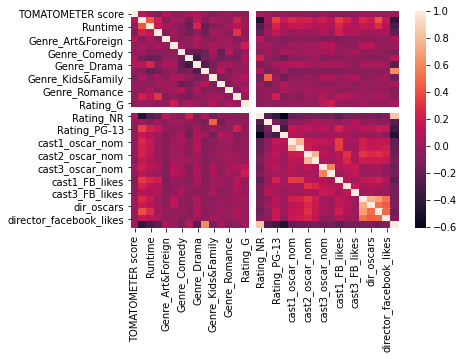

In [ ]:
corr = X_train_interactions.corr()
sns.heatmap(corr)

Assuming dataset is linear, use **Pearson**

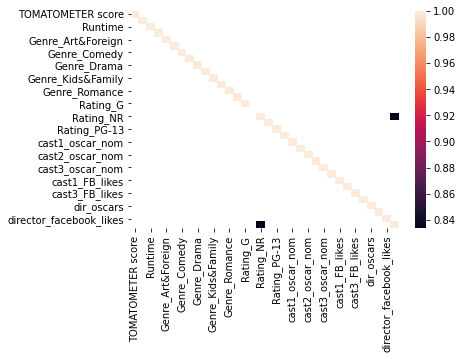

In [ ]:
corr2=X_train_interactions.corr(method="pearson")
corr2= corr2[corr2>=abs(0.8)]
sns.heatmap(corr2)

# Grid Search


For CART

In [ ]:
import numpy as np
# Dictionary of parameters to search
params_to_search = {
    'criterion': ['mse', 'friedman_mse'],
    'min_samples_leaf': [1, 2, 5, 10, 20,25,30],
    'max_features': ['auto', 'log2', None,'sqrt']
}

# Initialize a model
mdl = DecisionTreeRegressor(random_state=0)
# Initialize the grid search
optimized_dt = GridSearchCV(mdl, params_to_search, scoring=['r2'], refit=False, cv=5)
# Run the grid search
optimized_dt.fit(X_train, y_train)

# Find the model with the highest test score

cv_result_df = pd.DataFrame(optimized_dt.cv_results_)
best_model_params_index = cv_result_df.mean_test_r2.idxmax()
best_model_params = cv_result_df.params[best_model_params_index]

print(f'The best model parameters are {best_model_params}') 

# Initialize the model 
best_model = DecisionTreeRegressor(random_state=0, **best_model_params)

# Fit the model on the ENTIRE training set 
best_model.fit(X_train, y_train)

# Evaluate model precision, recall, and score
model_train_score = best_model.score(X_train,y_train)  # evaluate precision on test set
model_test_score = best_model.score(X_val, y_val)  # evaluate recall on test set

# Add model scores to all_models data frame
all_models.loc['CART', 'Grid_Search'] = (model_train_score, model_test_score, best_model)
all_models['TestScore'].loc['CART', ['Baseline', 'Grid_Search']]


The best model parameters are {'criterion': 'mse', 'max_features': 'auto', 'min_samples_leaf': 30}


model names  technique  
CART         Baseline      -0.346405
             Grid_Search    0.309302
Name: TestScore, dtype: float64

In [ ]:
import numpy as np
# Dictionary of parameters to search
params_to_search = {
    'splitter': ['best', 'random'],
    'max_leaf_nodes':[None, 2,5,10,15,20,25],
    'max_depth': np.arange(1,10)
}

# Initialize a model
mdl = DecisionTreeRegressor(random_state=0)
# Initialize the grid search
optimized_dt = GridSearchCV(mdl, params_to_search, scoring=['r2'], refit=False, cv=5)
# Run the grid search
optimized_dt.fit(X_train, y_train)

# Find the model with the highest test score

cv_result_df = pd.DataFrame(optimized_dt.cv_results_)
best_model_params_index = cv_result_df.mean_test_r2.idxmax()
best_model_params = cv_result_df.params[best_model_params_index]

print(f'The best model parameters are {best_model_params}') 

# Initialize the model 
best_model = DecisionTreeRegressor(random_state=0, **best_model_params)

# Fit the model on the ENTIRE training set 
best_model.fit(X_train, y_train)

# Evaluate model precision, recall, and score
model_train_score = best_model.score(X_train,y_train)  # evaluate precision on test set
model_test_score = best_model.score(X_val, y_val)  # evaluate recall on test set

# Add model scores to all_models data frame
all_models.loc['CART', 'Grid_Search'] = (model_train_score, model_test_score, best_model)
all_models['TestScore'].loc['CART', ['Baseline', 'Grid_Search']]


The best model parameters are {'max_depth': 4, 'max_leaf_nodes': 10, 'splitter': 'random'}


model names  technique  
CART         Baseline      -0.346405
             Grid_Search    0.351463
Name: TestScore, dtype: float64

In [ ]:
#all_models.loc[:,'Grid_Search',:]

For RF

In [ ]:
# Dictionary of parameters to search
params_to_search = {
    'criterion': ['mse', 'friedman_mse'],
    'min_samples_leaf': [1, 2, 5, 10, 20,25,30],
    
}

# Initialize a model
mdl = RandomForestRegressor(random_state=0)
# Initialize the grid search
optimized_dt = GridSearchCV(mdl, params_to_search, scoring=['r2'], refit=False, cv=5)
# Run the grid search
optimized_dt.fit(X_train, y_train)

# Find the model with the highest test score

cv_result_df = pd.DataFrame(optimized_dt.cv_results_)
best_model_params_index = cv_result_df.mean_test_r2.idxmax()
best_model_params = cv_result_df.params[best_model_params_index]

print(f'The best model parameters are {best_model_params}') 

# Initialize the model 
best_model = RandomForestRegressor(random_state=0, **best_model_params)

# Fit the model on the ENTIRE training set 
best_model.fit(X_train, y_train)

# Evaluate model precision, recall, and score
model_train_score = best_model.score(X_train,y_train)  # evaluate precision on test set
model_test_score = best_model.score(X_val, y_val)  # evaluate recall on test set

# Add model scores to all_models data frame
all_models.loc['RF', 'Grid_Search'] = (model_train_score, model_test_score, best_model)
all_models['TestScore'].loc['RF', ['Baseline', 'Grid_Search']]

The best model parameters are {'criterion': 'mse', 'min_samples_leaf': 30}


model names  technique  
RF           Baseline       0.339792
             Grid_Search    0.377860
Name: TestScore, dtype: float64

In [ ]:
# Dictionary of parameters to search
params_to_search = {
    'max_features': ['auto', 'log2', None,'sqrt'],
    "max_depth":np.arange(1,10)
}

# Initialize a model
mdl = RandomForestRegressor(random_state=0)
# Initialize the grid search
optimized_dt = GridSearchCV(mdl, params_to_search, scoring=['r2'], refit=False, cv=5)
# Run the grid search
optimized_dt.fit(X_train, y_train)

# Find the model with the highest test score

cv_result_df = pd.DataFrame(optimized_dt.cv_results_)
best_model_params_index = cv_result_df.mean_test_r2.idxmax()
best_model_params = cv_result_df.params[best_model_params_index]

print(f'The best model parameters are {best_model_params}') 

# Initialize the model 
best_model = RandomForestRegressor(random_state=0, **best_model_params)

# Fit the model on the ENTIRE training set 
best_model.fit(X_train, y_train)

# Evaluate model precision, recall, and score
model_train_score = best_model.score(X_train,y_train)  # evaluate precision on test set
model_test_score = best_model.score(X_val, y_val)  # evaluate recall on test set

# Add model scores to all_models data frame
all_models.loc['RF', 'Grid_Search'] = (model_train_score, model_test_score, best_model)
all_models['TestScore'].loc['RF', ['Baseline', 'Grid_Search']]

The best model parameters are {'max_depth': 3, 'max_features': 'auto'}


model names  technique  
RF           Baseline       0.339792
             Grid_Search    0.378242
Name: TestScore, dtype: float64

In [ ]:
# Dictionary of parameters to search
params_to_search = {
    'n_estimators':np.arange(1,30)
}

# Initialize a model
mdl = RandomForestRegressor(random_state=0)
# Initialize the grid search
optimized_dt = GridSearchCV(mdl, params_to_search, scoring=['r2'], refit=False, cv=5)
# Run the grid search
optimized_dt.fit(X_train, y_train)

# Find the model with the highest test score

cv_result_df = pd.DataFrame(optimized_dt.cv_results_)
best_model_params_index = cv_result_df.mean_test_r2.idxmax()
best_model_params = cv_result_df.params[best_model_params_index]

print(f'The best model parameters are {best_model_params}') 

# Initialize the model 
best_model = RandomForestRegressor(random_state=0, **best_model_params)

# Fit the model on the ENTIRE training set 
best_model.fit(X_train, y_train)

# Evaluate model precision, recall, and score
model_train_score = best_model.score(X_train,y_train)  # evaluate precision on test set
model_test_score = best_model.score(X_val, y_val)  # evaluate recall on test set

# Add model scores to all_models data frame
all_models.loc['RF', 'Grid_Search'] = (model_train_score, model_test_score, best_model)
all_models['TestScore'].loc['RF', ['Baseline', 'Grid_Search']]

The best model parameters are {'n_estimators': 29}


model names  technique  
RF           Baseline       0.339792
             Grid_Search    0.319159
Name: TestScore, dtype: float64

In [ ]:
#all_models.loc[:,'Grid_Search',:]

Fpr RidgeCV

In [ ]:
# Dictionary of parameters to search
params_to_search = {
    'fit_intercept': [True, False],
    'normalize': [True,False],
    'gcv_mode': ['auto', 'svd', 'eigen'],
}

# Initialize a model
mdl = RidgeCV()
# Initialize the grid search
optimized_dt = GridSearchCV(mdl, params_to_search, scoring=['r2'], refit=False, cv=5)
# Run the grid search
optimized_dt.fit(X_train, y_train)

# Find the model with the highest test score

cv_result_df = pd.DataFrame(optimized_dt.cv_results_)
best_model_params_index = cv_result_df.mean_test_r2.idxmax()
best_model_params = cv_result_df.params[best_model_params_index]

print(f'The best model parameters are {best_model_params}') 

# Initialize the model 
best_model = RidgeCV(**best_model_params)

# Fit the model on the ENTIRE training set 
best_model.fit(X_train, y_train)

# Evaluate model precision, recall, and score
model_train_score = best_model.score(X_train,y_train)  # evaluate precision on test set
model_test_score = best_model.score(X_val, y_val)  # evaluate recall on test set

# Add model scores to all_models data frame
all_models.loc['RidgeCV', 'Grid_Search'] = (model_train_score, model_test_score, best_model)
all_models['TestScore'].loc['RidgeCV', ['Baseline', 'Grid_Search']]

The best model parameters are {'fit_intercept': True, 'gcv_mode': 'eigen', 'normalize': False}


model names  technique  
RidgeCV      Baseline       0.374853
             Grid_Search    0.374853
Name: TestScore, dtype: float64

for LassoCV

In [ ]:
# Dictionary of parameters to search
params_to_search = {
    'fit_intercept': [True, False],
    'normalize': [True,False],
    'precompute':['auto',False,True],
}

# Initialize a model
mdl = LassoCV()
# Initialize the grid search
optimized_dt = GridSearchCV(mdl, params_to_search, scoring=['r2'], refit=False, cv=5)
# Run the grid search
optimized_dt.fit(X_train, y_train)

# Find the model with the highest test score

cv_result_df = pd.DataFrame(optimized_dt.cv_results_)
best_model_params_index = cv_result_df.mean_test_r2.idxmax()
best_model_params = cv_result_df.params[best_model_params_index]

print(f'The best model parameters are {best_model_params}') 

# Initialize the model 
best_model = LassoCV(**best_model_params)

# Fit the model on the ENTIRE training set 
best_model.fit(X_train, y_train)

# Evaluate model precision, recall, and score
model_train_score = best_model.score(X_train,y_train)  # evaluate precision on test set
model_test_score = best_model.score(X_val, y_val)  # evaluate recall on test set

# Add model scores to all_models data frame
all_models.loc['LassoCV', 'Grid_Search'] = (model_train_score, model_test_score, best_model)
all_models['TestScore'].loc['LassoCV', ['Baseline', 'Grid_Search']]

The best model parameters are {'fit_intercept': True, 'normalize': True, 'precompute': True}


model names  technique  
LassoCV      Baseline       0.348774
             Grid_Search    0.357671
Name: TestScore, dtype: float64

In [ ]:
# Dictionary of parameters to search
params_to_search = {
    'cv':[5,10,15,20]
}

# Initialize a model
mdl = LassoCV()
# Initialize the grid search
optimized_dt = GridSearchCV(mdl, params_to_search, scoring=['r2'], refit=False, cv=5)
# Run the grid search
optimized_dt.fit(X_train, y_train)

# Find the model with the highest test score

cv_result_df = pd.DataFrame(optimized_dt.cv_results_)
best_model_params_index = cv_result_df.mean_test_r2.idxmax()
best_model_params = cv_result_df.params[best_model_params_index]

print(f'The best model parameters are {best_model_params}') 

# Initialize the model 
best_model = LassoCV(**best_model_params)

# Fit the model on the ENTIRE training set 
best_model.fit(X_train, y_train)

# Evaluate model precision, recall, and score
model_train_score = best_model.score(X_train,y_train)  # evaluate precision on test set
model_test_score = best_model.score(X_val, y_val)  # evaluate recall on test set

# Add model scores to all_models data frame
all_models.loc['LassoCV', 'Grid_Search'] = (model_train_score, model_test_score, best_model)
all_models['TestScore'].loc['LassoCV', ['Baseline', 'Grid_Search']]

The best model parameters are {'cv': 20}


model names  technique  
LassoCV      Baseline       0.348774
             Grid_Search    0.352312
Name: TestScore, dtype: float64

For LinReg

In [ ]:
# Dictionary of parameters to search
params_to_search = {
    'fit_intercept': [True, False],
    'normalize': [True,False],
    'n_jobs':[0,1,2,3]
}

# Initialize a model
mdl = LinearRegression()
# Initialize the grid search
optimized_dt = GridSearchCV(mdl, params_to_search, scoring=['r2'], refit=False, cv=5)
# Run the grid search
optimized_dt.fit(X_train, y_train)

# Find the model with the highest test score

cv_result_df = pd.DataFrame(optimized_dt.cv_results_)
best_model_params_index = cv_result_df.mean_test_r2.idxmax()
best_model_params = cv_result_df.params[best_model_params_index]

print(f'The best model parameters are {best_model_params}') 

# Initialize the model 
best_model = LinearRegression(**best_model_params)

# Fit the model on the ENTIRE training set 
best_model.fit(X_train, y_train)

# Evaluate model precision, recall, and score
model_train_score = best_model.score(X_train,y_train)  # evaluate precision on test set
model_test_score = best_model.score(X_val, y_val)  # evaluate recall on test set

# Add model scores to all_models data frame
all_models.loc['LinReg', 'Grid_Search'] = (model_train_score, model_test_score, best_model)
all_models['TestScore'].loc['LinReg', ['Baseline', 'Grid_Search']]

The best model parameters are {'fit_intercept': False, 'n_jobs': 0, 'normalize': True}


model names  technique  
LinReg       Baseline       0.371280
             Grid_Search    0.369227
Name: TestScore, dtype: float64

Grid Search Result

In [ ]:
all_models.loc[:,'Grid_Search',:]

,TrainScore,TestScore,Model
model names,,,
LinReg,0.367663,0.369227,"LinearRegression(copy_X=True, fit_intercept=Fa..."
LassoCV,0.341227,0.352312,"LassoCV(alphas=None, copy_X=True, cv=20, eps=0..."
RidgeCV,0.366021,0.374853,"RidgeCV(alphas=array([ 0.1, 1. , 10. ]), cv=N..."
RF,0.898089,0.319159,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio..."
CART,0.345567,0.351463,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."


# Stacking

In [ ]:
'''A stacked model that begins with clustering'''
technique_name = 'Stacking'

# Initialize the clustering model
model = KMeans(n_init=10, n_clusters=8, random_state=0)
model.fit(X_train)

# Stack training data
X_train_prediction = pd.Series(model.predict(X_train), 
                            name='cluster',
                            index=X_train.index)

# One-hot-encode cluster numbers
X_train_prediction = pd.get_dummies(X_train_prediction)
# Add cluster numbers to features
X_train_stacked = X_train.join(X_train_prediction)

# Stack testing data
X_val_prediction = pd.Series(model.predict(X_val),
                             name='cluster',
                             index=X_val.index)
# One-hot-encode cluster numbers
X_val_prediction = pd.get_dummies(X_val_prediction)
# Get cluster numbers that weren't predicted in the testing set
missing_cluster_columns = X_train_prediction.columns.difference(X_val_prediction.columns)
# Add missing cluster dummy variables
X_val_prediction[missing_cluster_columns] = 0 
# Add cluster numbers to features
X_val_stacked = X_val.join(X_val_prediction)

# We will use logistic regression instead of a decision tree at the higher-level classifier
all_models = fit_and_score_model(all_models, technique_name, X_train_stacked, X_val_stacked, y_train, y_val)
compare_models(technique_name)

LinReg achieved a train score of 0.372 and test score of 0.366
LassoCV achieved a train score of 0.339 and test score of 0.349
RidgeCV achieved a train score of 0.367 and test score of 0.375
RF achieved a train score of 0.903 and test score of 0.323
CART achieved a train score of 1.000 and test score of -0.261
On average, scores improved by 0.01, and the most improvement was 0.09


In [ ]:
'''A stacked model that begins with clustering'''
technique_name = 'Stacking'

# Initialize the clustering model
model = KMeans(n_init=10, n_clusters=8, random_state=0)
model.fit(X_train)

# Stack training data
X_train_prediction = pd.Series(model.predict(X_train), 
                            name='cluster',
                            index=X_train.index)

# One-hot-encode cluster numbers
X_train_prediction = pd.get_dummies(X_train_prediction)
# Add cluster numbers to features
X_train_stacked = X_train.join(X_train_prediction)

# Stack testing data
X_val_prediction = pd.Series(model.predict(X_val),
                             name='cluster',
                             index=X_val.index)
# One-hot-encode cluster numbers
X_val_prediction = pd.get_dummies(X_val_prediction)
# Get cluster numbers that weren't predicted in the testing set
missing_cluster_columns = X_train_prediction.columns.difference(X_val_prediction.columns)
# Add missing cluster dummy variables
X_val_prediction[missing_cluster_columns] = 0 
# Add cluster numbers to features
X_val_stacked = X_val.join(X_val_prediction)

# We will use logistic regression instead of a decision tree at the higher-level classifier
all_models = fit_and_score_model(all_models, technique_name, X_train_stacked, X_val_stacked, y_train, y_val)
compare_models(technique_name)

LinReg achieved a train score of 0.372 and test score of 0.366
LassoCV achieved a train score of 0.339 and test score of 0.349
RidgeCV achieved a train score of 0.367 and test score of 0.375
RF achieved a train score of 0.903 and test score of 0.349
CART achieved a train score of 1.000 and test score of -0.303
On average, scores improved by 0.01, and the most improvement was 0.04


In [ ]:
X_train_interactions_overall

,TOMATOMETER score,TOMATOMETER Count,Runtime,Genre_Action,Genre_Art&Foreign,Genre_Classics,Genre_Comedy,Genre_Documentary,Genre_Drama,Genre_Horror,Genre_Kids&Family,Genre_Mystery,Genre_Romance,Genre_SciFi,Rating_G,Rating_NC17,Rating_NR,Rating_PG,Rating_PG-13,Rating_R,cast1_oscar_nom,cast1_oscars,cast2_oscar_nom,cast2_oscars,cast3_oscar_nom,cast3_oscars,cast1_FB_likes,cast2_FB_likes,cast3_FB_likes,dir_oscar_nom,dir_oscars,director_awards,director_facebook_likes,Genre_Horror + Rating_G + Rating_NR,total_cast_facebook_likes
70,95.0,19,70,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,488.0,367.0,367.0,0.0,0.0,0.0,232.0,1,1222.0
75,73.0,15,71,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,367.0,367.0,367.0,0.0,0.0,0.0,232.0,2,1101.0
889,92.0,7,104,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,367.0,367.0,367.0,0.0,0.0,0.0,232.0,1,1101.0
1210,40.0,190,120,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,8000.0,5000.0,367.0,0.0,0.0,6.0,124.0,0,13367.0
720,63.0,104,82,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,338.0,367.0,956.0,0.0,0.0,0.0,232.0,1,1661.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,50.0,34,83,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,221.0,367.0,367.0,0.0,0.0,0.0,232.0,0,955.0
256,40.0,129,110,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,3.0,1.0,0.0,0.0,1000.0,9000.0,367.0,0.0,0.0,0.0,232.0,0,10367.0
968,96.0,15,130,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,367.0,367.0,367.0,0.0,0.0,0.0,0.0,0,1101.0
952,78.0,11,78,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,367.0,367.0,367.0,0.0,0.0,0.0,232.0,2,1101.0


With feature engineering (used for "Stacking" in all_models)

In [ ]:
'''A stacked model that begins with clustering'''
technique_name = 'Stacking'

# Initialize the clustering model
model = KMeans(n_init=10, n_clusters=8, random_state=0)
model.fit(X_train_interactions_overall)

# Stack training data
X_train_prediction = pd.Series(model.predict(X_train_interactions_overall), 
                            name='cluster',
                            index=X_train_interactions_overall.index)

# One-hot-encode cluster numbers
X_train_prediction = pd.get_dummies(X_train_prediction)
# Add cluster numbers to features
X_train_stacked = X_train_interactions_overall.join(X_train_prediction)

# Stack testing data
X_val_prediction = pd.Series(model.predict(X_val_interactions_overall),
                             name='cluster',
                             index=X_val_interactions_overall.index)
# One-hot-encode cluster numbers
X_val_prediction = pd.get_dummies(X_val_prediction)
# Get cluster numbers that weren't predicted in the testing set
missing_cluster_columns = X_train_prediction.columns.difference(X_val_prediction.columns)
# Add missing cluster dummy variables
X_val_prediction[missing_cluster_columns] = 0 
# Add cluster numbers to features
X_val_stacked = X_val_interactions_overall.join(X_val_prediction)

# We will use logistic regression instead of a decision tree at the higher-level classifier
all_models = fit_and_score_model(all_models, technique_name, X_train_stacked, X_val_stacked, y_train, y_val)
compare_models(technique_name)

LinReg achieved a train score of 0.365 and test score of -184023294.141
LassoCV achieved a train score of 0.339 and test score of 0.349
RidgeCV achieved a train score of 0.368 and test score of 0.380
RF achieved a train score of 0.901 and test score of 0.338
CART achieved a train score of 1.000 and test score of -0.411
On average, scores improved by -36804658.91, and the most improvement was 0.00


# Bagging

In [ ]:
from sklearn.ensemble import VotingRegressor
technique_name = 'Bagging'

# Get a list of initialized models for bagging
models_dict = make_models()
# Convert models to list of tuples (required by documentation)
model_list = list(models_dict.items()) 

# Set the weights for each model as their relative performance
bagging_weights = all_models.TestScore[:,'Baseline'].values

# Initialize bagging model
bagging_model = VotingRegressor(model_list, weights=bagging_weights)
# Fit the bagging model (i.e., each of the four models that are bagged)
bagging_model.fit(X_train.values, y_train.values)

# Predict the target using the bagged model
bagging_prediction = bagging_model.predict(X_val)

# Evaluate ensemble model
fit_and_score_model(all_models,technique_name,X_train,X_val,y_train,y_val)

# Add ensemble model to all_models dataframe (commenting this out bc fit_and)score_model does this already)
#all_models.loc[:, technique_name, :] = (trainscore, testscore, None) 
compare_models(technique_name)


LinReg achieved a train score of 0.368 and test score of 0.371
LassoCV achieved a train score of 0.339 and test score of 0.349
RidgeCV achieved a train score of 0.366 and test score of 0.375
RF achieved a train score of 0.902 and test score of 0.354
CART achieved a train score of 1.000 and test score of -0.271
On average, scores improved by 0.02, and the most improvement was 0.08


##Using differnt classifier

Find the one

In [ ]:
from sklearn.metrics import r2_score
technique_name = 'bagging_all'

# Get a list of initialized models for bagging
models_dict = make_models()
models_dict.pop('CART')
#models_dict.pop('RF')

engineering_techniques_use = ('Baseline',  # Set of baseline models
                          #'Scaling',  # Set of models trained with scaled data
                          #'Feature_Engineering',  # Set of models trained with engineered features
                          #'Feature_Engineering_overall', # trying
                          'Feature_Selection',  # Set of models trained with "selected" features
                          'Grid_Search',  # Set of models trained via grid search
                          #'Stacking',  # Set of stacked model 
                          'Bagging',   # A bagged model
                          #'Mutual_Regression (scaled)', # Set of models trained with features from MI using scaled data
                          'Mutual_Regression' # Set of models trained with features from MI using normal data
                          )

# Convert models to list of tuples (required by documentation)
model_list = list(models_dict.items()) 
bagging_prediction_ultimate = []
bagging_weights =[]
bagging_weight2 = []

for  k in engineering_techniques_use:

  # Set the weights for each model as their relative performance
  bagging_collector = all_models.TestScore[:,k].values
  bagging_weights.extend(bagging_collector[:4]) 
  bagging_weight2.append(bagging_collector[:4]) 
  #Initialize bagging model
print(bagging_weights)
print(bagging_weight2)


[0.3712804963638475, 0.3487735520917514, 0.37485310335255473, 0.3397915289081095, 0.3670586844358734, 0.3487735520917514, 0.37327630699875003, 0.34201920725017454, 0.36922698886613137, 0.3523123986199891, 0.37485305819557435, 0.31915910730342967, 0.3712804963638475, 0.3487735520917514, 0.37485310335255473, 0.3539881834589317, 0.3678670882112004, 0.35070923803106757, 0.3674072834495563, 0.24821172384365478]
[array([0.3712805 , 0.34877355, 0.3748531 , 0.33979153]), array([0.36705868, 0.34877355, 0.37327631, 0.34201921]), array([0.36922699, 0.3523124 , 0.37485306, 0.31915911]), array([0.3712805 , 0.34877355, 0.3748531 , 0.35398818]), array([0.36786709, 0.35070924, 0.36740728, 0.24821172])]


In [ ]:
for  j in bagging_weight2:
  for i in range(len(model_list)):
    model_list[i][1].fit(X_train.values, y_train.values)
    prediction = model_list[i][1].predict(X_val)

    if bagging_prediction_ultimate==[]:
      bagging_prediction_ultimate = prediction*j[i]/sum(bagging_weights)
    else:
      bagging_prediction_ultimate = bagging_prediction_ultimate+prediction*j[i]/sum(bagging_weights)
      


test_score = r2_score(y_val,bagging_prediction_ultimate)

all_models.loc['LinReg', 'bagging_all'] = (0,test_score,None)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_lau

ValueError: ignored

Overall improvements

In [ ]:
from sklearn.metrics import r2_score
technique_name = 'Bagging_feature_engi_average'

# Get a list of initialized models for bagging
models_dict = make_models()
models_dict.pop('CART')
#models_dict.pop('RF')

# Convert models to list of tuples (required by documentation)
model_list = list(models_dict.items()) 

# Set the weights for each model as their relative performance
bagging_weights = all_models.TestScore[:,'Feature_Engineering_overall'].values
bagging_weights = bagging_weights[:4]
#Initialize bagging model

bagging_prediction_f = []

for i in range(len(model_list)):
  model_list[i][1].fit(X_train_interactions_overall.values, y_train.values)
  prediction = model_list[i][1].predict(X_val_interactions_overall)

  if bagging_prediction_f==[]:
    bagging_prediction_f = prediction*bagging_weights[i]/sum(bagging_weights)
  else:
    bagging_prediction_f = bagging_prediction_f+prediction*bagging_weights[i]/sum(bagging_weights)
    


r2_score(y_val,bagging_prediction_f)





/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


0.38409822479510525

mutual

In [ ]:
from sklearn.metrics import r2_score
technique_name = 'Bagging_mutual'

# Get a list of initialized models for bagging
models_dict = make_models()
models_dict.pop('CART')
#models_dict.pop('RF')

# Convert models to list of tuples (required by documentation)
model_list = list(models_dict.items()) 

# Set the weights for each model as their relative performance
bagging_weights = all_models.TestScore[:,'Mutual_Regression (scaled)'].values
bagging_weights = bagging_weights[:4]
#Initialize bagging model

bagging_prediction_m = []

for i in range(len(model_list)):
  model_list[i][1].fit(X_train_scaled.values, y_train_scaled.values)
  prediction = model_list[i][1].predict(X_val_scaled)

  if bagging_prediction_m==[]:
    bagging_prediction_m = prediction*bagging_weights[i]/sum(bagging_weights)
  else:
    bagging_prediction_m = bagging_prediction_m+prediction*bagging_weights[i]/sum(bagging_weights)
    


r2_score(y_val_scaled,bagging_prediction_m )



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


0.3806071608154279

In [ ]:
from sklearn.metrics import r2_score
technique_name = 'Bagging_scaling'

# Get a list of initialized models for bagging
models_dict = make_models()
models_dict.pop('CART')
#models_dict.pop('RF')

# Convert models to list of tuples (required by documentation)
model_list = list(models_dict.items()) 

# Set the weights for each model as their relative performance
bagging_weights = all_models.TestScore[:,'Scaling'].values
bagging_weights = bagging_weights[:4]
#Initialize bagging model

bagging_prediction_s = []

for i in range(len(model_list)):
  model_list[i][1].fit(X_train_scaled.values, y_train_scaled.values)
  prediction = model_list[i][1].predict(X_val_scaled)

  if bagging_prediction_s==[]:
    bagging_prediction_s = prediction*bagging_weights[i]/sum(bagging_weights)
  else:
    bagging_prediction_s = bagging_prediction_s+prediction*bagging_weights[i]/sum(bagging_weights)
    


r2_score(y_val_scaled,bagging_prediction_s )



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


0.3856208884044049

In [ ]:
all_models['TestScore'].sort_values(ascending = False)[:20]

model names  technique                  
RidgeCV      Stacking                       0.379721
LinReg       Mutual_Regression (scaled)     0.378511
RidgeCV      Mutual_Regression (scaled)     0.377349
             Feature_Engineering_overall    0.375641
             Feature_Engineering            0.375641
             Baseline                       0.374853
             Bagging                        0.374853
             Grid_Search                    0.374853
             Feature_Selection              0.373276
LinReg       Bagging                        0.371280
             Baseline                       0.371280
             Feature_Engineering_overall    0.371158
             Feature_Engineering            0.371158
             Grid_Search                    0.369227
             Scaling                        0.368755
RidgeCV      Scaling                        0.367947
LinReg       Mutual_Regression              0.367867
RidgeCV      Mutual_Regression              0.367407
LinRe

In [ ]:
fo = all_models.loc[:,'Feature_Engineering_overall',:]['TestScore'].sort_values(ascending = False)[:4].mean()
print(fo)

0.3590642953462805


In [ ]:
m = all_models.loc[:,'Mutual_Regression (scaled)',:]['TestScore'].sort_values(ascending = False)[:4].mean()
s = all_models.loc[:,'Scaling',:]['TestScore'].sort_values(ascending = False)[:4].mean()
print(m)
print(s)

0.34282624300374154
0.36103143830186013


In [ ]:
bagging_prediction_avenger = bagging_prediction_m*m/(s+m)+bagging_prediction_s*s/(s+m)

r2_score(y_val_scaled,bagging_prediction_avenger)

0.3833858782257835

mutual regression

In [ ]:
from sklearn.metrics import r2_score
technique_name = 'Bagging_scaling'

# Get a list of initialized models for bagging
models_dict = make_models()
models_dict.pop('CART')
#models_dict.pop('RF')


# Convert models to list of tuples (required by documentation)
model_list = list(models_dict.items()) 

# Set the weights for each model as their relative performance
bagging_weights = all_models.TestScore[:,'Mutual_Regression (scaled)'].values
bagging_weights = bagging_weights[:4]

#Initialize bagging model

bagging_prediction = []

for i in range(len(model_list)):
  model_list[i][1].fit(X_train_scaled.values, y_train_scaled.values)
  prediction = model_list[i][1].predict(X_val_scaled)

  if bagging_prediction==[]:
    bagging_prediction = prediction*bagging_weights[i]/sum(bagging_weights)
  else:
    bagging_prediction = bagging_prediction+prediction*bagging_weights[i]/sum(bagging_weights)
    


r2_score(y_val_scaled,bagging_prediction)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


0.3801674898817844

# Best Model

In [ ]:
all_models

TrainScore  ...  bagging_all
model names technique                                ...             
LinReg      Baseline                       0.367663  ...          NaN
            Scaling                        0.366933  ...          NaN
            Feature_Engineering            0.367663  ...          NaN
            Feature_Engineering_overall    0.367663  ...          NaN
            Feature_Selection              0.364208  ...          NaN
            Grid_Search                    0.367663  ...          NaN
            Stacking                       0.365337  ...          NaN
            Bagging                        0.367663  ...          NaN
            Bagging_all                         NaN  ...          NaN
            Mutual_Regression (scaled)     0.346013  ...          NaN
            Mutual_Regression              0.344286  ...          NaN
LassoCV     Baseline                       0.338874  ...          NaN
            Scaling                        0.352108  ...          NaN
            Feature_Engineering            0.338874  ...          NaN
            Feature_Engineering_overall    0.338932  ...          NaN
            Feature_Selection              0.338874  ...          NaN
            Grid_Search                    0.341227  ...          NaN
            Stacking                       0.338932  ...          NaN
            Bagging                        0.338874  ...          NaN
            Bagging_all                         NaN  ...          NaN
            Mutual_Regression (scaled)     0.341012  ...          NaN
            Mutual_Regression              0.338597  ...          NaN
RidgeCV     Baseline                       0.366021  ...          NaN
            Scaling                        0.365794  ...          NaN
            Feature_Engineering            0.366076  ...          NaN
            Feature_Engineering_overall    0.366076  ...          NaN
            Feature_Selection              0.363367  ...          NaN
            Grid_Search                    0.366021  ...          NaN
            Stacking                       0.368001  ...          NaN
            Bagging                        0.366021  ...          NaN
            Bagging_all                         NaN  ...          NaN
            Mutual_Regression (scaled)     0.345944  ...          NaN
            Mutual_Regression              0.344255  ...          NaN
RF          Baseline                       0.902733  ...          NaN
            Scaling                        0.903476  ...          NaN
            Feature_Engineering            0.901118  ...          NaN
            Feature_Engineering_overall    0.902333  ...          NaN
            Feature_Selection              0.901064  ...          NaN
            Grid_Search                    0.898089  ...          NaN
            Stacking                       0.901370  ...          NaN
            Bagging                        0.901600  ...          NaN
            Bagging_all                         NaN  ...          NaN
            Mutual_Regression (scaled)     0.877126  ...          NaN
            Mutual_Regression              0.877738  ...          NaN
CART        Baseline                       1.000000  ...          NaN
            Scaling                        1.000000  ...          NaN
            Feature_Engineering            1.000000  ...          NaN
            Feature_Engineering_overall    1.000000  ...          NaN
            Feature_Selection              1.000000  ...          NaN
            Grid_Search                    0.345567  ...          NaN
            Stacking                       1.000000  ...          NaN
            Bagging                        1.000000  ...          NaN
            Bagging_all                         NaN  ...          NaN
            Mutual_Regression (scaled)     0.975718  ...          NaN
            Mutual_Regression              0.976900  ...          NaN

[55 rows x 4 columns]

In [ ]:
all_models['TestScore'].sort_values(ascending = False)[:10]

model names  technique                  
RidgeCV      Stacking                       0.379721
LinReg       Mutual_Regression (scaled)     0.378511
RidgeCV      Mutual_Regression (scaled)     0.377349
             Feature_Engineering_overall    0.375641
             Feature_Engineering            0.375641
             Baseline                       0.374853
             Bagging                        0.374853
             Grid_Search                    0.374853
             Feature_Selection              0.373276
LinReg       Bagging                        0.371280
Name: TestScore, dtype: float64

In [ ]:
highest_score_idx = all_models['TestScore'].idxmax()

all_models.loc[[highest_score_idx ]]

,,TrainScore,TestScore,Model,bagging_all
model names,technique,,,,
RidgeCV,Stacking,0.368001,0.379721,"RidgeCV(alphas=array([ 0.1, 1. , 10. ]), cv=N...",NaN


# Stack top 10 best performing models



## Not Scaled 

'LinReg': LinearRegression(),
      'LassoCV': LassoCV(),
      'RidgeCV': RidgeCV(),
      'RF': RandomForestRegressor(),
      'CART': DecisionTreeRegressor()
  }

Basic Models

In [ ]:
from sklearn.ensemble import StackingRegressor
base_models = [('RIDGE', RidgeCV()),
               ('LR', LinearRegression()),
               ('RF', RandomForestRegressor())]
meta_model = RidgeCV()
stacking_model = StackingRegressor(estimators=base_models, 
                                    final_estimator=meta_model, 
                                    passthrough=True, 
                                    cv=5,
                                    verbose=2)

fit_score_single_model(stacking_model,"stacking", X_train, X_val, y_train, y_val)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


stacking achieved a train score of 0.454 and test score of 0.386


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.5s finished


(0.4539668516650039, 0.38550350045614445)

With optimal RF GridSearch params

In [ ]:
from sklearn.ensemble import StackingRegressor
base_models = [('RIDGE', RidgeCV()),
               ('LR', LinearRegression()),
               ('RF', RandomForestRegressor(criterion="mse",max_features="auto", min_samples_leaf=30,max_depth=3,n_estimators=29))]
meta_model = RidgeCV()
stacking_model = StackingRegressor(estimators=base_models, 
                                    final_estimator=meta_model, 
                                    passthrough=True, 
                                    cv=5,
                                    verbose=2)

fit_score_single_model(stacking_model,"stacking", X_train, X_val, y_train, y_val)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


stacking achieved a train score of 0.364 and test score of 0.384


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished


(0.36416976545511337, 0.38380283637237034)

## Scaled

Basic Models

In [ ]:
from sklearn.ensemble import StackingRegressor
base_models = [('RIDGE', RidgeCV()),
               ('LR', LinearRegression()),
               ('RF', RandomForestRegressor())]
meta_model = RidgeCV()
stacking_model = StackingRegressor(estimators=base_models, 
                                    final_estimator=meta_model, 
                                    passthrough=True, 
                                    cv=5,
                                    verbose=2)

fit_score_single_model(stacking_model,"stacking", X_train_scaled, X_val_scaled, y_train_scaled, y_val_scaled)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


stacking achieved a train score of 0.497 and test score of 0.385


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.4s finished


(0.4971500754402214, 0.3850413594253099)

## Feature Selection & Scaled

In [ ]:
base_models = [('RIDGE', RidgeCV()),
               ('LR', LinearRegression()),
               ('RF', RandomForestRegressor(criterion="mse",max_features="auto", min_samples_leaf=30,max_depth=3,n_estimators=29))]
meta_model = RidgeCV()
stacking_model = StackingRegressor(estimators=base_models, 
                                    final_estimator=meta_model, 
                                    passthrough=True, 
                                    cv=5,
                                    verbose=2)

fit_score_single_model(stacking_model,"stacking", X_train_feature_selection, X_val_feature_selection, y_train_scaled,y_val_scaled)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


stacking achieved a train score of 0.365 and test score of 0.399


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished


(0.3651550324407543, 0.3988692299813194)

## Stacked 

In [ ]:
base_models = [('RIDGE', RidgeCV(fit_intercept=True,gcv_mode="eigen",normalize=False)),
               ("LASSO", LassoCV(fit_intercept=True, normalize=True,precompute=True,cv=20)),
               ('RF', RandomForestRegressor(criterion="mse",max_features="auto", min_samples_leaf=30,max_depth=3,n_estimators=29))]

meta_model = RidgeCV()
stacking_model = StackingRegressor(estimators=base_models, 
                                    final_estimator=meta_model, 
                                    passthrough=True, 
                                    cv=5,
                                    verbose=2)

fit_score_single_model(stacking_model,"stacking",X_train_stacked, X_val_stacked, y_train, y_val)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


stacking achieved a train score of 0.366 and test score of 0.382


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished


(0.36600875173088987, 0.38196140623556885)

## X_train_interactions

In [ ]:
from sklearn.ensemble import StackingRegressor
base_models = [('RIDGE', RidgeCV(fit_intercept=True,gcv_mode="eigen",normalize=False)),
               ("LASSO", LassoCV(fit_intercept=True, normalize=True,precompute=True,cv=20)),
               ('RF', RandomForestRegressor(criterion="mse",max_features="auto", min_samples_leaf=30,max_depth=3,n_estimators=29))]

meta_model = RidgeCV()
stacking_model = StackingRegressor(estimators=base_models, 
                                    final_estimator=meta_model, 
                                    passthrough=True, 
                                    cv=5,
                                    verbose=2)

fit_score_single_model(stacking_model,"stacking",X_train_interactions, X_val_interactions, y_train, y_val)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


stacking achieved a train score of 0.369 and test score of 0.385


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished


(0.36904150265760477, 0.3851383625152257)

# Optimal Parameters 

## Ridge

In [ ]:
'fit_intercept': True, 'gcv_mode': 'eigen', 'normalize': False

## LinReg

In [ ]:
'fit_intercept': False, 'n_jobs': 0, 'normalize': True

## Lasso

In [ ]:
'fit_intercept': True, 'normalize': True, 'precompute': True,'cv': 20

## CART

In [ ]:
'criterion': 'mse', 'max_features': 'auto', 'min_samples_leaf': 30,'max_depth': 4, 'max_leaf_nodes': 10, 'splitter': 'random'

## RF

In [ ]:
'criterion': 'mse', 'min_samples_leaf': 30,'max_depth': 3, 'max_features': 'auto','n_estimators': 29